<h1>Welcome to Colab!</h1>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  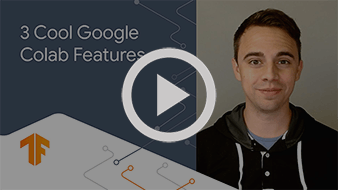
  </a>
</center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

d=pd.read_csv('/content/garments_worker_productivity.csv')
print(d)
d1=d.drop(d['wip'])
#x=d.iloc[:,1:]
#y=d.iloc[:,17:18]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=17)

print(x_train)

In [15]:
print(d1)
x=d1.iloc[:,1:11]
y=d1.iloc[:,11:12]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=17)

print(x_train)

      Unnamed: 0  team  targeted_productivity    smv     wip  over_time  \
0            0.0     8                   0.80  26.16  1108.0       7080   
1            0.0     1                   0.75   3.94     0.0        960   
2            0.0    11                   0.80  11.41   968.0       3660   
3            0.0    12                   0.80  11.41   968.0       3660   
4            0.0     6                   0.80  25.90  1170.0       1920   
...          ...   ...                    ...    ...     ...        ...   
1192         0.0    10                   0.75   2.90     0.0        960   
1193         0.0     8                   0.70   3.90     0.0        960   
1194         0.0     7                   0.65   3.90     0.0        960   
1195         0.0     9                   0.75   2.90     0.0       1800   
1196         0.0     6                   0.70   2.90     0.0        720   

      incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0            98        0

In [16]:
print(x_test)

      team  targeted_productivity    smv     wip  over_time  incentive  \
694     10                   0.80  22.52  1268.0          0         88   
1134     3                   0.80  30.10   964.0       5160         50   
1132     1                   0.75  26.82  1322.0       7140         65   
567      4                   0.80   4.30     0.0       1440          0   
976     12                   0.80   4.60     0.0       3780          0   
...    ...                    ...    ...     ...        ...        ...   
617      4                   0.35  30.10   287.0       6060         23   
1127     6                   0.60   2.90     0.0        960          0   
600      3                   0.80  22.52   968.0       6840        113   
805      7                   0.70   5.13     0.0       1200          0   
21       9                   0.80   4.15     0.0        960          0   

      idle_time  idle_men  no_of_style_change  no_of_workers  
694         0.0         0                   0   

In [17]:
print(y_train)

     actual_productivity
524             0.971867
838             0.580000
655             1.000019
136             0.800497
35              0.701812
..                   ...
278             0.987197
752             0.800889
406             0.750079
143             0.712626
623             0.942500

[837 rows x 1 columns]


In [18]:
print(y_test)

      actual_productivity
694              0.900632
1134             0.800842
1132             0.850427
567              0.809236
976              0.590617
...                   ...
617              0.350706
1127             0.271875
600              1.000230
805              0.913750
21               0.956271

[360 rows x 1 columns]


In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

dt=SVR()
cc=dt.fit(x_train,y_train)

yt=cc.predict(x_test)
print(mean_squared_error(yt,y_test))

0.02927545878757121


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
dt1=DecisionTreeRegressor()
c1=dt1.fit(x_train,y_train)
yp=c1.predict(x_test)
print(mean_squared_error(yp,y_test))

0.024941040519600152


[Text(0.4820895744650078, 0.98, 'X[1] <= 0.725\nsquared_error = 0.031\nsamples = 837\nvalue = 0.732'),
 Text(0.1797522045210952, 0.94, 'X[4] <= 3330.0\nsquared_error = 0.03\nsamples = 312\nvalue = 0.642'),
 Text(0.0741742180648933, 0.9, 'X[0] <= 5.5\nsquared_error = 0.036\nsamples = 115\nvalue = 0.713'),
 Text(0.030156874208321152, 0.86, 'X[0] <= 2.5\nsquared_error = 0.024\nsamples = 51\nvalue = 0.786'),
 Text(0.010133489233167689, 0.82, 'X[4] <= 1860.0\nsquared_error = 0.029\nsamples = 18\nvalue = 0.68'),
 Text(0.00623599337425704, 0.78, 'X[4] <= 1080.0\nsquared_error = 0.029\nsamples = 16\nvalue = 0.701'),
 Text(0.00311799668712852, 0.74, 'X[1] <= 0.65\nsquared_error = 0.028\nsamples = 9\nvalue = 0.652'),
 Text(0.00155899834356426, 0.7, 'squared_error = 0.0\nsamples = 1\nvalue = 0.951'),
 Text(0.00467699503069278, 0.7, 'X[0] <= 1.5\nsquared_error = 0.019\nsamples = 8\nvalue = 0.615'),
 Text(0.00311799668712852, 0.66, 'squared_error = 0.005\nsamples = 2\nvalue = 0.736'),
 Text(0.00623

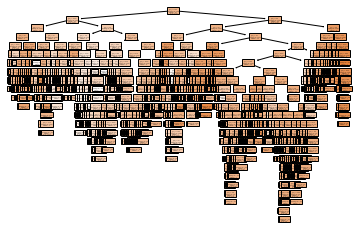

In [31]:
from sklearn import tree
tree.plot_tree(c1,filled=True)

[Text(0.4820895744650078, 0.98, 'X[1] <= 0.725\nsquared_error = 0.031\nsamples = 837\nvalue = 0.732'),
 Text(0.1797522045210952, 0.94, 'X[4] <= 3330.0\nsquared_error = 0.03\nsamples = 312\nvalue = 0.642'),
 Text(0.0741742180648933, 0.9, 'X[0] <= 5.5\nsquared_error = 0.036\nsamples = 115\nvalue = 0.713'),
 Text(0.030156874208321152, 0.86, 'X[0] <= 2.5\nsquared_error = 0.024\nsamples = 51\nvalue = 0.786'),
 Text(0.010133489233167689, 0.82, 'X[4] <= 1860.0\nsquared_error = 0.029\nsamples = 18\nvalue = 0.68'),
 Text(0.00623599337425704, 0.78, 'X[4] <= 1080.0\nsquared_error = 0.029\nsamples = 16\nvalue = 0.701'),
 Text(0.00311799668712852, 0.74, 'X[1] <= 0.65\nsquared_error = 0.028\nsamples = 9\nvalue = 0.652'),
 Text(0.00155899834356426, 0.7, 'squared_error = 0.0\nsamples = 1\nvalue = 0.951'),
 Text(0.00467699503069278, 0.7, 'X[0] <= 1.5\nsquared_error = 0.019\nsamples = 8\nvalue = 0.615'),
 Text(0.00311799668712852, 0.66, 'squared_error = 0.005\nsamples = 2\nvalue = 0.736'),
 Text(0.00623

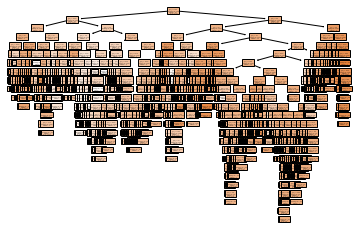

In [30]:
from sklearn import tree
tree.plot_tree(c1,filled=True)




<h1>What is Colab?</h1>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with 
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

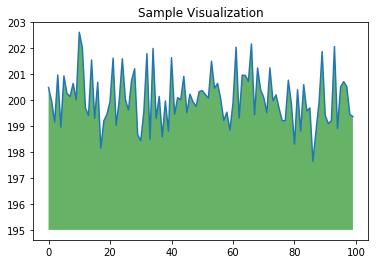

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

### Featured examples

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
